In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

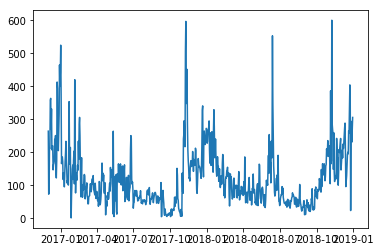

In [2]:
df = pd.read_excel('Delhi2yrs.xlsx')
df1 = pd.read_excel('Delhi2yrs.xlsx')
def conv(x):
    return float(x)

df["PM2_5"]=df["PM2_5"].apply(conv)
df1["PM2_5"]=df1["PM2_5"].apply(conv)
df = pd.DataFrame(data =df , columns=['Date','PM2_5'])
df1 = pd.DataFrame(data =df1 , columns=['Date','PM2_5'])

df = df.set_index(['Date'])
plt.plot(df)

<Figure size 432x288 with 0 Axes>

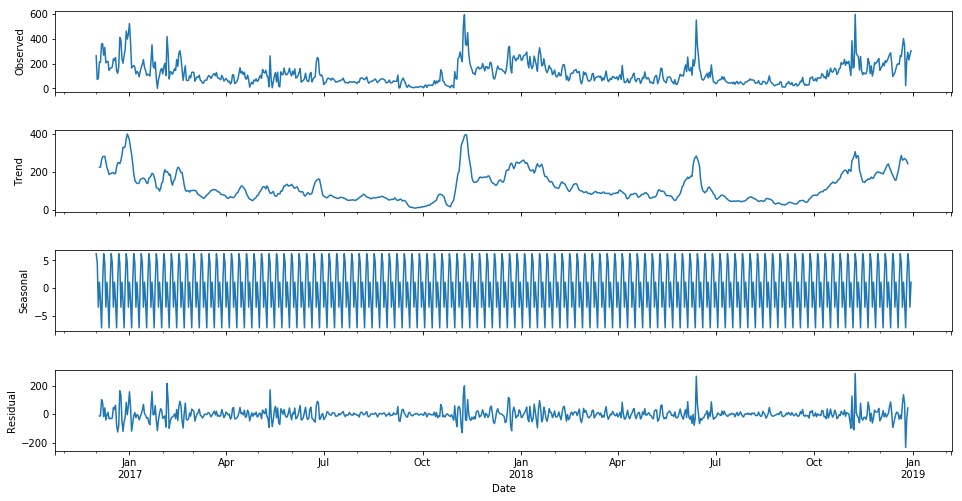

In [3]:
decomposition = seasonal_decompose(df)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid


In [76]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    
    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

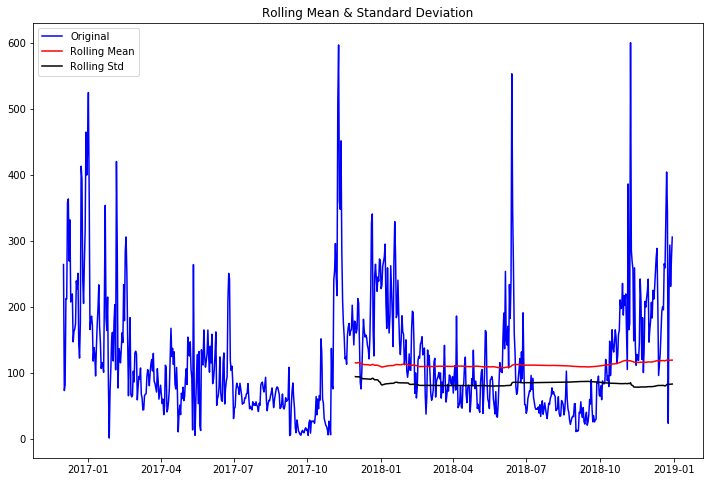

Results of Dickey-Fuller Test:
Test Statistic                  -3.461709
p-value                          0.009027
#Lags Used                      12.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64


In [77]:
test_stationarity(df["PM2_5"])

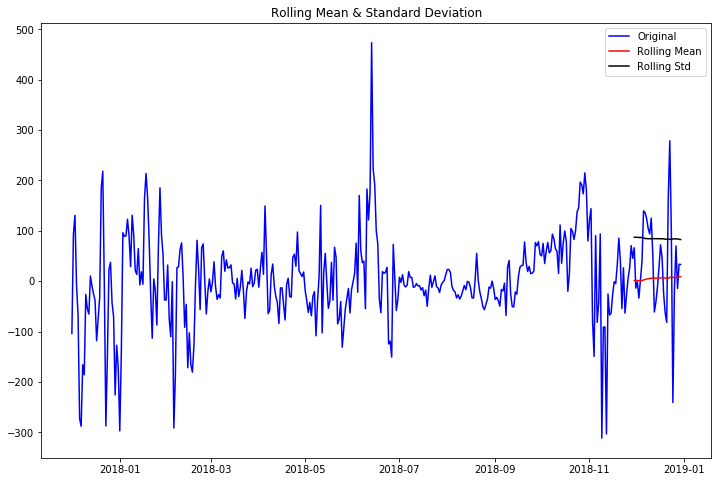

Results of Dickey-Fuller Test:
Test Statistic                -6.158006e+00
p-value                        7.288716e-08
#Lags Used                     4.000000e+00
Number of Observations Used    3.900000e+02
Critical Value (1%)           -3.447229e+00
Critical Value (5%)           -2.868980e+00
Critical Value (10%)          -2.570733e+00
dtype: float64


In [78]:
df['first_difference'] = df["PM2_5"] - df["PM2_5"].shift(365)
test_stationarity(df['first_difference'].dropna(inplace=False))

In [ ]:
df['seasonal_first_difference'] = df['first_difference'] - df['first_difference'].shift(90)   
test_stationarity(df['seasonal_first_difference'].dropna(inplace=False))

/home/nishant/.conda/envs/tensorflow/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


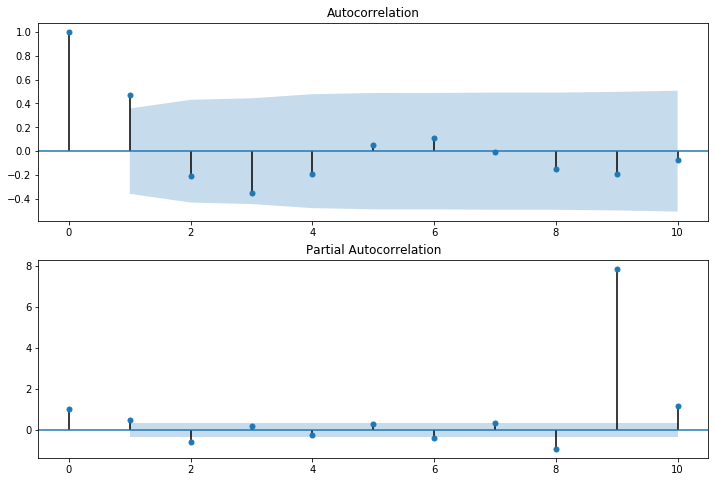

In [107]:
#df["seasonal_first_difference"].head(750)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["seasonal_first_difference"].iloc[730:],lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["seasonal_first_difference"].iloc[730:], lags=10, ax=ax2)

In [109]:
mod = sm.tsa.statespace.SARIMAX(df["PM2_5"], trend='ct', order=(1,1,1), seasonal_order=(0,1,0,365))
results = mod.fit()
print(results.summary())


/home/nishant/.conda/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


KeyboardInterrupt: 

In [ ]:
df['forecast'] = results.predict(start=720, end=760,dynamic= True)  
df[['PM2_5', 'forecast']].plot(figsize=(12, 8))

In [60]:
results.predict(start=600,end=700,dynamic=True)
x=results.forecast(steps=700)

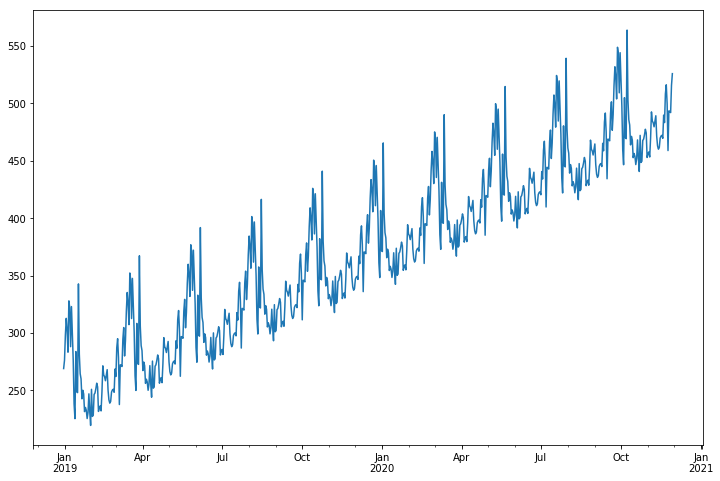

In [61]:
x.plot(figsize=(12,8))

In [56]:
x.head(50)

2018-12-31    268.986628
2019-01-01    276.194317
2019-01-02    298.159575
2019-01-03    312.717610
2019-01-04    302.523040
2019-01-05    283.247159
2019-01-06    327.934928
2019-01-07    322.045755
2019-01-08    288.043890
2019-01-09    322.973181
2019-01-10    300.627808
2019-01-11    276.478469
2019-01-12    238.236869
2019-01-13    225.341258
2019-01-14    283.797402
2019-01-15    248.833423
2019-01-16    248.054791
2019-01-17    342.697277
2019-01-18    281.550635
2019-01-19    264.482488
2019-01-20    259.998668
2019-01-21    242.632038
2019-01-22    250.073465
2019-01-23    246.907416
2019-01-24    231.487120
2019-01-25    235.133060
2019-01-26    232.720220
2019-01-27    225.481963
2019-01-28    230.723450
2019-01-29    246.969714
2019-01-30    231.280745
2019-01-31    219.463144
2019-02-01    250.910670
2019-02-02    227.324381
2019-02-03    228.440140
2019-02-04    246.465268
2019-02-05    247.672487
2019-02-06    251.466863
2019-02-07    256.255489
2019-02-08    253.015371
